In [2]:
import pandas as pd
from sklearn.manifold import TSNE
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
from rdkit import DataStructs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
bgc = pd.read_csv('merge_data/bgc_data_cleaned.csv')
bgc

,accession,SMILES,source
0,BGC0001464,Brc1[nH]c(Br)c(Br)c1Br,mibig
1,BGC0000892,C#CC#CC#CC#CC=CC=CC(O)CCCCC(=O)O,mibig
2,BGC0002804,C#CC#CC#CC#CC=CCCCCCCCC(=O)O,mibig
3,BGC0001897,C#CC#CC=C=CC1OC1C(O)C=CC1CCC(=O)O1,mibig
4,BGC0001994,C#CC(O)C(N)C(=O)O,mibig
...,...,...,...
2242,streptoseomycin.fasta,COC1CC2C=CC3CC4CC(O)C3C2(O4)C(C)=CC2COC(=O)CCC...,prism
2243,Thanamycin.fasta,CC=C1NC(=O)C(C(C)O)NC(=O)C(Cc2cccc3[nH]ccc23)N...,prism
2244,tiancimycin_BGC0001378.fasta,Cc1cc2c(c3c1C(=O)c1ccc(C(=O)O)c(O)c1C3=O)NC1C#...,prism
2245,titanium_padanamide.fasta,COCC(=O)NC(C(=O)N1NCCCC1C(=O)NC(Cc1ccccc1)C(O)...,prism


In [5]:
fp_generator = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)

bgc['fingerprint'] = bgc['SMILES'].apply(lambda x: fp_generator.GetFingerprint(Chem.MolFromSmiles(x)))
    

[14:00:29] WARNING: not removing hydrogen atom without neighbors
[14:00:29] WARNING: not removing hydrogen atom without neighbors
[14:00:29] WARNING: not removing hydrogen atom without neighbors
[14:00:29] WARNING: not removing hydrogen atom without neighbors


In [6]:

def fp_to_array(fp):
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

fp_array = np.array([fp_to_array(fp) for fp in bgc['fingerprint']])


In [7]:
tsne = TSNE(n_components=2, random_state=333)
tsne_results = tsne.fit_transform(fp_array)

In [8]:
tsne_df = pd.DataFrame({
    'tsne_1': tsne_results[:,0],
    'tsne_2': tsne_results[:,1],
    'source': bgc['source']
})

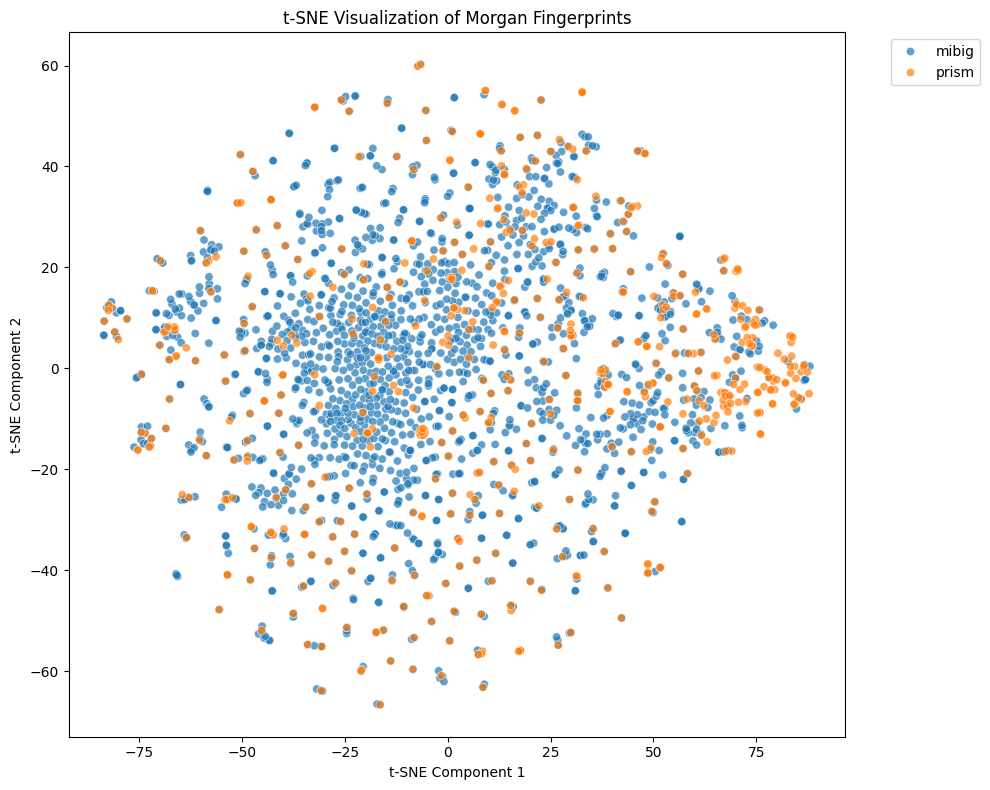

In [9]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=tsne_df, x='tsne_1', y='tsne_2', hue='source', alpha=0.7)
plt.title('t-SNE Visualization of Morgan Fingerprints')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()